# EDA - Análise Exploratória de Dados
Projeto Final - EBAC

In [3]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ecommerce_eventos_2017_final.csv/bq-results-20250922-120224-1758542585154.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,order_item_id,product_id,seller_id,order_date,shipping_limit_date,evento_30d,product_category_name_pt,price,freight_value,valor_item,valor_pedido,tipo_pagamento,ticket_medio,data_pico,volume_pico
0,eb188a175542057d90b3ca5628b7b5a0,2,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-02-18,2017-02-22,Dia do Consumidor,ferramentas_jardim,99.9,14.87,114.77,573.85,credit_card,162.482961,2017-03-13,111
1,eb188a175542057d90b3ca5628b7b5a0,1,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-02-18,2017-02-22,Dia do Consumidor,ferramentas_jardim,99.9,14.87,114.77,573.85,credit_card,162.482961,2017-03-13,111
2,eb188a175542057d90b3ca5628b7b5a0,3,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-02-18,2017-02-22,Dia do Consumidor,ferramentas_jardim,99.9,14.87,114.77,573.85,credit_card,162.482961,2017-03-13,111
3,eb188a175542057d90b3ca5628b7b5a0,4,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-02-18,2017-02-22,Dia do Consumidor,ferramentas_jardim,99.9,14.87,114.77,573.85,credit_card,162.482961,2017-03-13,111
4,eb188a175542057d90b3ca5628b7b5a0,5,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-02-18,2017-02-22,Dia do Consumidor,ferramentas_jardim,99.9,14.87,114.77,573.85,credit_card,162.482961,2017-03-13,111


## 1. Inspeção inicial do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25761 entries, 0 to 25760
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  25761 non-null  object 
 1   order_item_id             25761 non-null  int64  
 2   product_id                25761 non-null  object 
 3   seller_id                 25761 non-null  object 
 4   order_date                25761 non-null  object 
 5   shipping_limit_date       25761 non-null  object 
 6   evento_30d                25761 non-null  object 
 7   product_category_name_pt  25335 non-null  object 
 8   price                     25761 non-null  float64
 9   freight_value             25761 non-null  float64
 10  valor_item                25761 non-null  float64
 11  valor_pedido              25761 non-null  float64
 12  tipo_pagamento            25761 non-null  object 
 13  ticket_medio              25761 non-null  float64
 14  data_p

In [5]:
df.describe()

,order_item_id,price,freight_value,valor_item,valor_pedido,ticket_medio,volume_pico
count,25761.000000,25761.000000,25761.000000,25761.000000,25761.000000,25761.000000,25761.000000
mean,1.203758,118.196154,19.354462,137.550616,176.149386,157.781795,542.803851
std,0.732865,171.429136,14.315275,178.088291,240.838009,6.590419,414.897707
min,1.000000,1.200000,0.020000,6.080000,11.630000,149.588184,111.000000
25%,1.000000,39.900000,13.370000,55.100000,65.710000,152.244865,190.000000
50%,1.000000,73.000000,16.010000,90.180000,114.250000,162.482961,498.000000
75%,1.000000,130.000000,19.990000,155.150000,194.170000,165.295515,1166.000000
max,21.000000,4690.000000,314.400000,4764.340000,6081.540000,165.295515,1166.000000


In [6]:
df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
order_date,0
shipping_limit_date,0
evento_30d,0
product_category_name_pt,426
price,0
freight_value,0


## 2. Distribuição do valor_pedido por evento

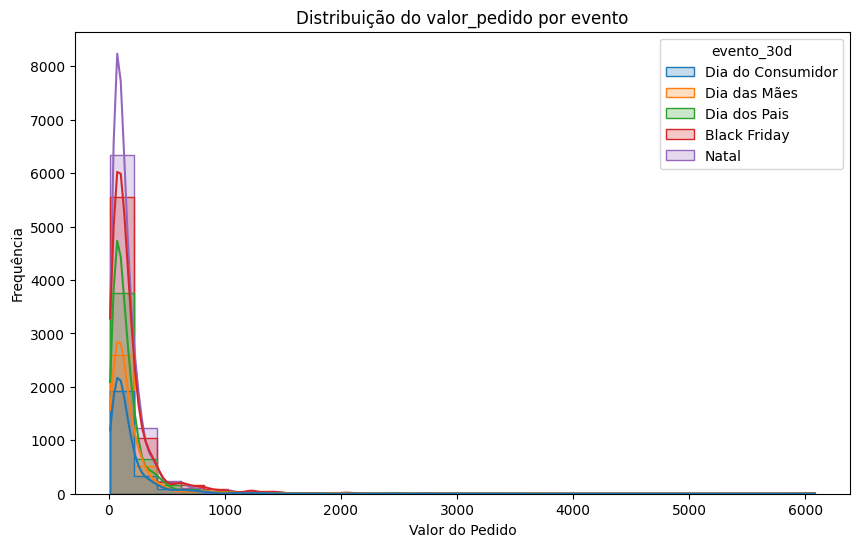

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='valor_pedido', hue='evento_30d', kde=True, element='step', bins=30)
plt.title('Distribuição do valor_pedido por evento')
plt.xlabel('Valor do Pedido')
plt.ylabel('Frequência')
plt.show()


## 3. Volume de pedidos por evento

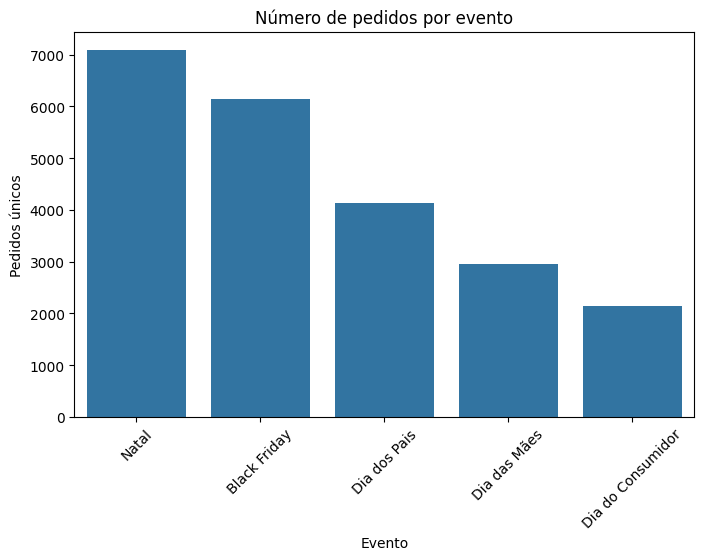

In [8]:

pedidos_por_evento = df.groupby('evento_30d')['order_id'].nunique().reset_index()
pedidos_por_evento = pedidos_por_evento.sort_values(by='order_id', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=pedidos_por_evento, x='evento_30d', y='order_id')
plt.title('Número de pedidos por evento')
plt.xlabel('Evento')
plt.ylabel('Pedidos únicos')
plt.xticks(rotation=45)
plt.show()


## 4. Top 5 categorias mais vendidas por evento

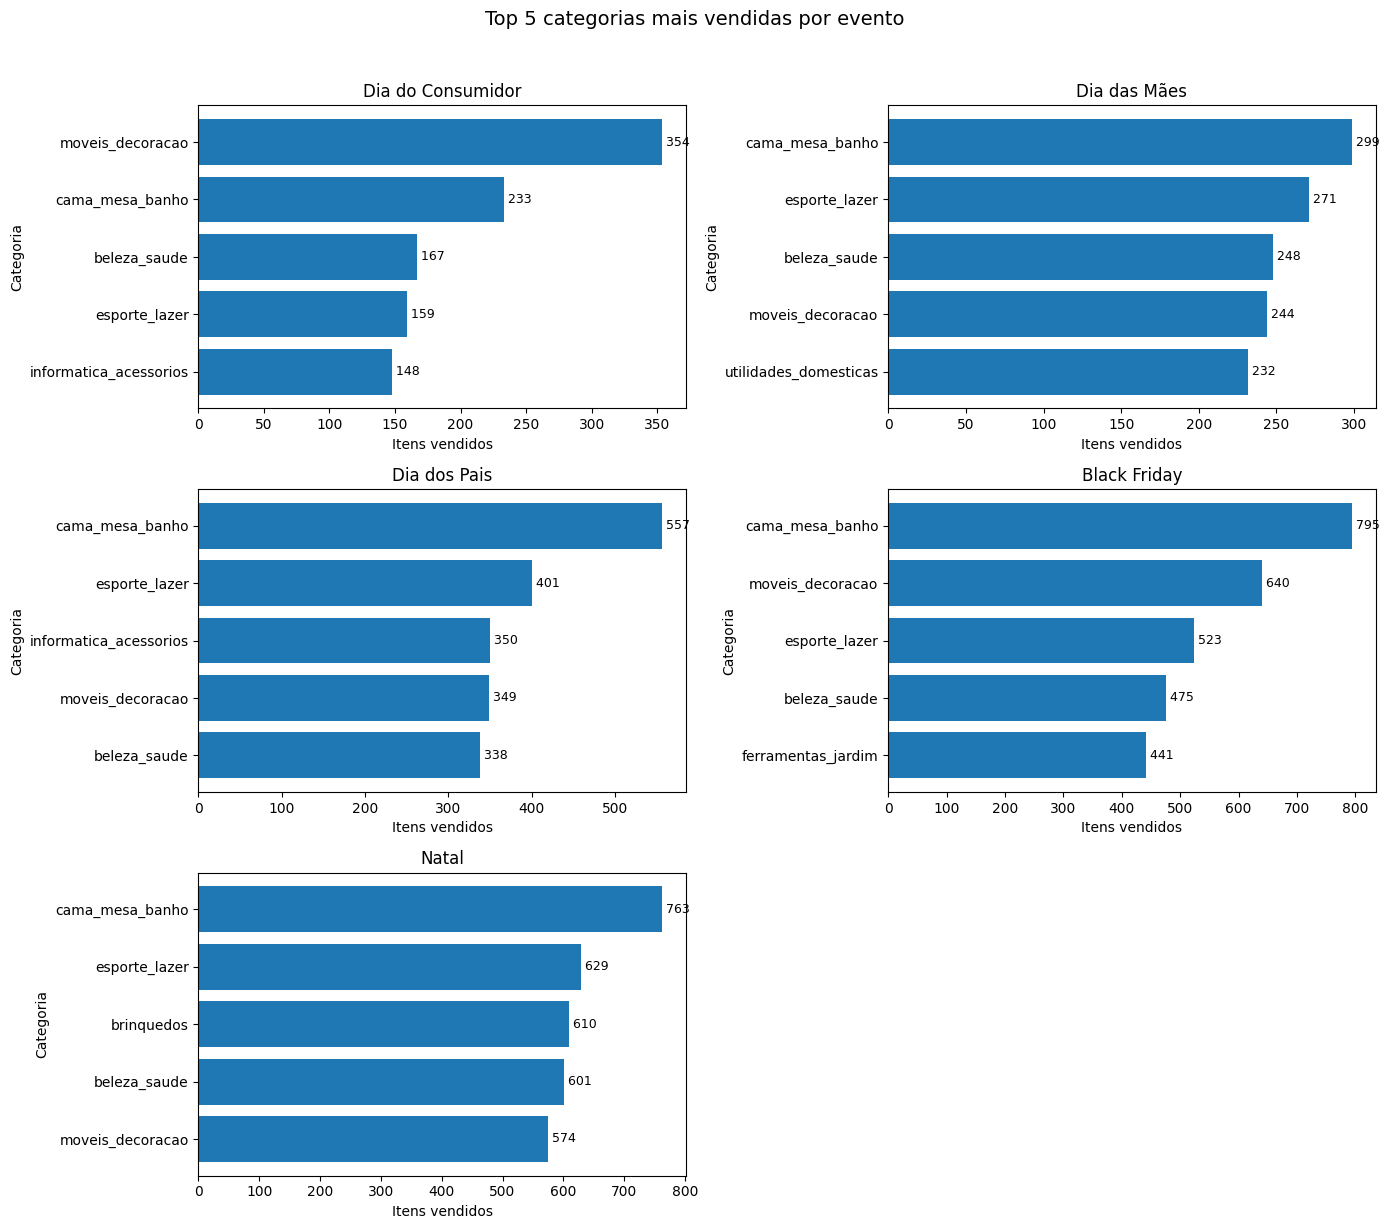

In [12]:
# 4. Top 5 categorias mais vendidas por evento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# garante que não haja NaN no nome da categoria
df['product_category_name_pt'] = df['product_category_name_pt'].fillna('sem_categoria')

# calcula top 5 por evento
tmp = (
    df.groupby(['evento_30d', 'product_category_name_pt'])['order_item_id']
      .count().rename('itens').reset_index()
)

top5 = (
    tmp.sort_values(['evento_30d', 'itens'], ascending=[True, False])
       .groupby('evento_30d')
       .head(5)
)

# ordem sugerida dos eventos (mantém apenas os que existem no dataset)
ordem_eventos = ["Dia do Consumidor", "Dia das Mães", "Dia dos Pais", "Black Friday", "Natal"]
eventos = [e for e in ordem_eventos if e in top5['evento_30d'].unique()]

# grid de subplots
cols = 2
rows = int(np.ceil(len(eventos) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), squeeze=False)

for i, ev in enumerate(eventos):
    ax = axes[i // cols, i % cols]
    data = top5[top5['evento_30d'] == ev].sort_values('itens')  # ordena p/ barh (de baixo p/ cima)
    labels = [textwrap.fill(str(c), 22) for c in data['product_category_name_pt']]  # quebra nomes longos

    ax.barh(labels, data['itens'])
    ax.set_title(ev)
    ax.set_xlabel('Itens vendidos')
    ax.set_ylabel('Categoria')

    # anota valores à direita das barras
    for y, v in enumerate(data['itens'].values):
        ax.text(v, y, f' {v}', va='center', ha='left', fontsize=9)

# remove eixos vazios, se houver
total_axes = rows * cols
for j in range(len(eventos), total_axes):
    fig.delaxes(axes[j // cols, j % cols])

fig.suptitle('Top 5 categorias mais vendidas por evento', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


## 5. Ticket médio por forma de pagamento e evento (heatmap)

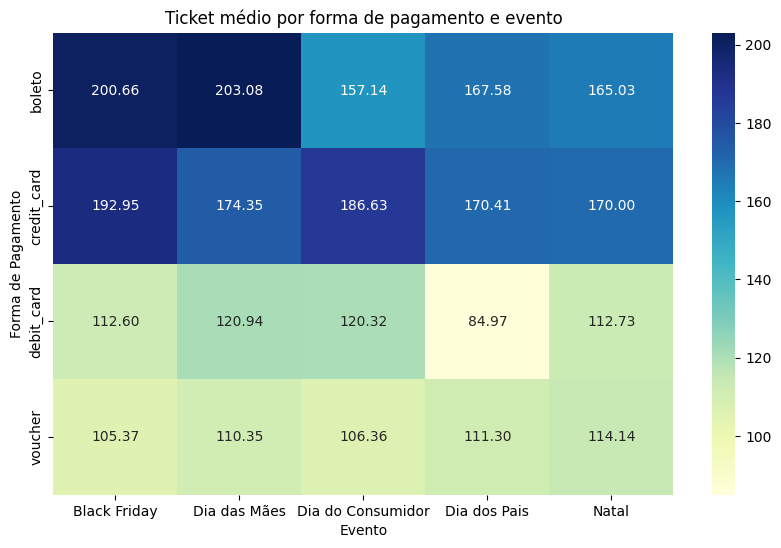

In [10]:

pivot = df.groupby(['evento_30d', 'tipo_pagamento'])['valor_pedido'].mean().reset_index()
pivot_table = pivot.pivot(index='tipo_pagamento', columns='evento_30d', values='valor_pedido')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Ticket médio por forma de pagamento e evento')
plt.xlabel('Evento')
plt.ylabel('Forma de Pagamento')
plt.show()


## 6. Evolução diária de pedidos por evento (versão suavizada)

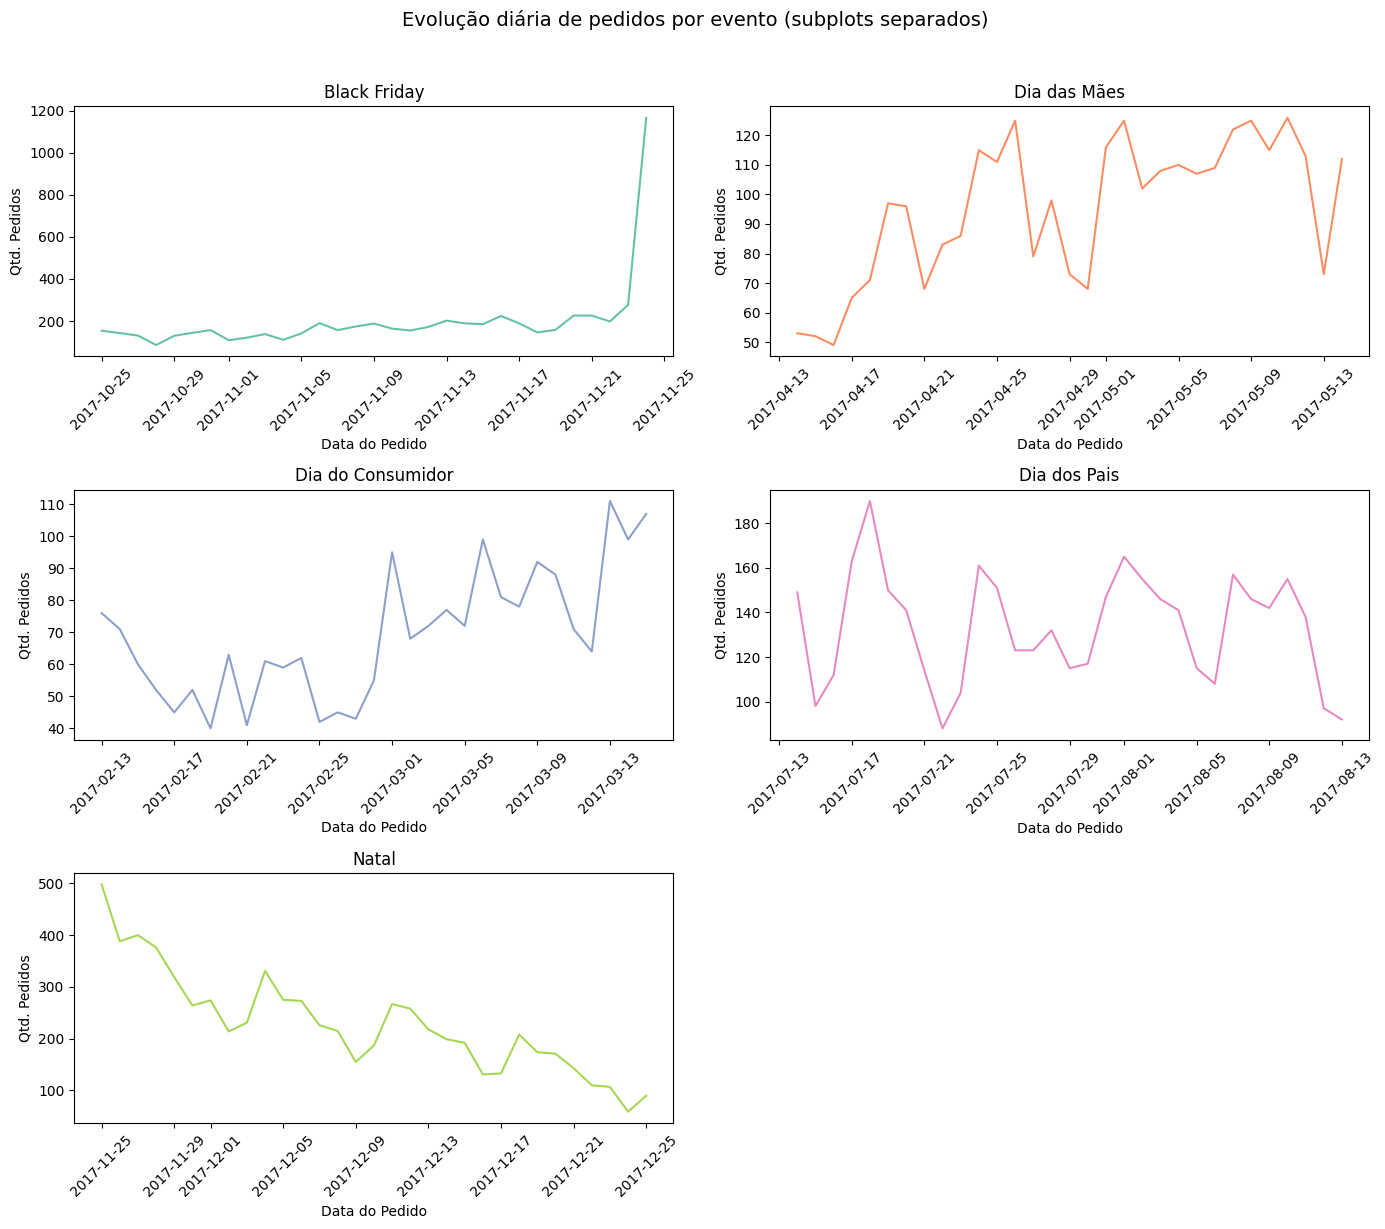

In [13]:
# 6. Evolução diária de pedidos por evento (um gráfico por evento)
import matplotlib.pyplot as plt
import seaborn as sns

df['order_date'] = pd.to_datetime(df['order_date'])

# Agrupa por evento e data
pedidos_diarios = df.groupby(['evento_30d', 'order_date'])['order_id'].nunique().reset_index()

# Define ordem dos eventos (ajusta se quiser)
eventos = pedidos_diarios['evento_30d'].unique()
cores = sns.color_palette("Set2", len(eventos))

# Cria subplots
cols = 2
rows = int(len(eventos) / cols + 0.5)
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), sharex=False)

for i, evento in enumerate(eventos):
    ax = axes[i // cols, i % cols]
    data = pedidos_diarios[pedidos_diarios['evento_30d'] == evento]
    sns.lineplot(data=data, x='order_date', y='order_id', ax=ax, color=cores[i])
    ax.set_title(evento)
    ax.set_xlabel('Data do Pedido')
    ax.set_ylabel('Qtd. Pedidos')
    ax.tick_params(axis='x', rotation=45)

# Remove eixos extras se sobrarem
if len(eventos) < (rows * cols):
    for j in range(len(eventos), rows * cols):
        fig.delaxes(axes[j // cols, j % cols])

fig.suptitle('Evolução diária de pedidos por evento (subplots separados)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()



## 7. Conclusões e insights



- O evento com **maior volume de pedidos** foi: **Natal**, com aproximadamente **7.100 pedidos únicos** realizados no período de 30 dias.

- O evento com **maior faturamento total** pode ter sido o **Natal**, considerando o maior volume, mas com base no **ticket médio**, o destaque foi o evento **Dia das Mães**, onde o **boleto bancário teve ticket médio de R$ 203,08**.

- O **ticket médio** mais alto foi observado em **Dia das Mães com boleto**, seguido de **Black Friday com boleto**.

- A **categoria mais comprada com maior presença entre os eventos foi `cama_mesa_banho`**, que aparece como Top 1 ou Top 2 em quase todos os eventos analisados.

- Os **picos de compras** mostram que o comportamento do consumidor varia:
  - **Black Friday** concentra as compras no pico da promoção (24/11).
  - **Natal** e **Dia das Mães** apresentam compras mais distribuídas ao longo dos 30 dias.

Esses achados serão utilizados para embasar o dashboard interativo no Looker Studio.


